In [1]:
# import libraries
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import pyfolio as pf
import datetime
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

c:\Users\ezlik\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


# 1. Linear Regression Model

In [11]:
class LinearRegressionModel():

    def __init__(self, symbol, start, end=datetime.datetime.now()):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.get_data()
    
    def get_data(self):

        # extract data
        data = yf.download(self.symbol, self.start, self.end)

        # target variable
        target = "Close"

        # predictors
        predictor = ["Open", "High", "Low", "Volume"]

        # create features
        X = data[predictor]
        y = data[target]

        # split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # create model
        self.model = LinearRegression()

        # fit model
        self.model.fit(X_train, y_train)

        # predict
        y_pred = self.model.predict(X_test)

        # evaluate
        print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
        print('R2 Score: %.2f' % r2_score(y_test, y_pred))
        print("#" * 50)

        # generate entry and exit signals
        data["Predicted"] = self.model.predict(data[predictor])
        buysignals = data[data["Close"] < data["Predicted"]]
        sellsignals = data[data["Close"] > data["Predicted"]]

        # position
        data["position"] = np.where(data["Close"] < data["Predicted"], 1, -1)

        # buy and hold strategy
        data["buy_and_hold"] = np.log(data["Close"] / data["Close"].shift(1))

        # strategy returns
        data["strategy"] = data["position"].shift(1) * data["buy_and_hold"]

        # drop na
        data.dropna(inplace=True)

        # set date as index
        data.reset_index(inplace=True)
        data.set_index('Date', inplace=True)

        # assign to self
        self.data = data
        self.buysignals = buysignals
        self.sellsignals = sellsignals

        return data, buysignals, sellsignals    
    
    def performance_summary(self):

        # calculate sum of buy_and_hold
        # calculate sum
        print("Sum of buy_and_hold:")
        print(self.data[["buy_and_hold", "strategy"]].sum(), "\n")
        print("#" * 50)

        # calculate what $1 would be worth
        print("What $1 would be worth:")
        print(self.data[["buy_and_hold", "strategy"]].cumsum().apply(np.exp), "\n")
        print("#" * 50)

        # calculate performance metrics
        print("Performance metrics:")
        pf.show_perf_stats(self.data["strategy"])
        print("#" * 50)

        # Plot graph
        self.data[["buy_and_hold", "strategy"]].cumsum().apply(np.exp).plot(figsize=(10, 8))
        plt.legend(loc="upper left")
        plt.title(f"{self.symbol} Linear Regression Model Performance")
        plt.ylabel("Price (USD)")
        plt.xlabel("Date")

        # plot buy and sell signals
        self.data[["Close"]].plot(figsize=(10, 8), color="gray", zorder=1)
        plt.title(f"Buy and Sell signals of {self.symbol}")
        plt.ylabel("Price (USD)")
        plt.xlabel("Date")

        plt.scatter(self.buysignals.index, self.buysignals["Close"], marker="^", color="green")
        plt.scatter(self.sellsignals.index, self.sellsignals["Close"], marker="v", color="red")               

        plt.legend()
        plt.show()

[*********************100%***********************]  1 of 1 completed
Mean squared error: 0.87
Coefficient of determination: 1.00
##################################################
Sum of buy_and_hold:
buy_and_hold    0.910742
strategy        2.250416
dtype: float64 

##################################################
What $1 would be worth:
            buy_and_hold  strategy
Date                              
2020-01-03      0.990278  1.009817
2020-01-06      0.998169  1.017864
2020-01-07      0.993474  1.022674
2020-01-08      1.009456  1.039125
2020-01-09      1.030897  1.061197
...                  ...       ...
2023-06-16      2.462727  9.691716
2023-06-20      2.463925  9.687001
2023-06-21      2.449942  9.632025
2023-06-22      2.490428  9.475440
2023-06-23      2.486166  9.491683

[874 rows x 2 columns] 

##################################################
Performance metrics:


Start date,2020-01-03
End date,2023-06-23
Total months,41
,Backtest
Annual return,79.9%
Cumulative returns,666.7%
Annual volatility,35.0%
Sharpe ratio,1.85
Calmar ratio,4.18
Stability,0.84
Max drawdown,-19.1%


##################################################


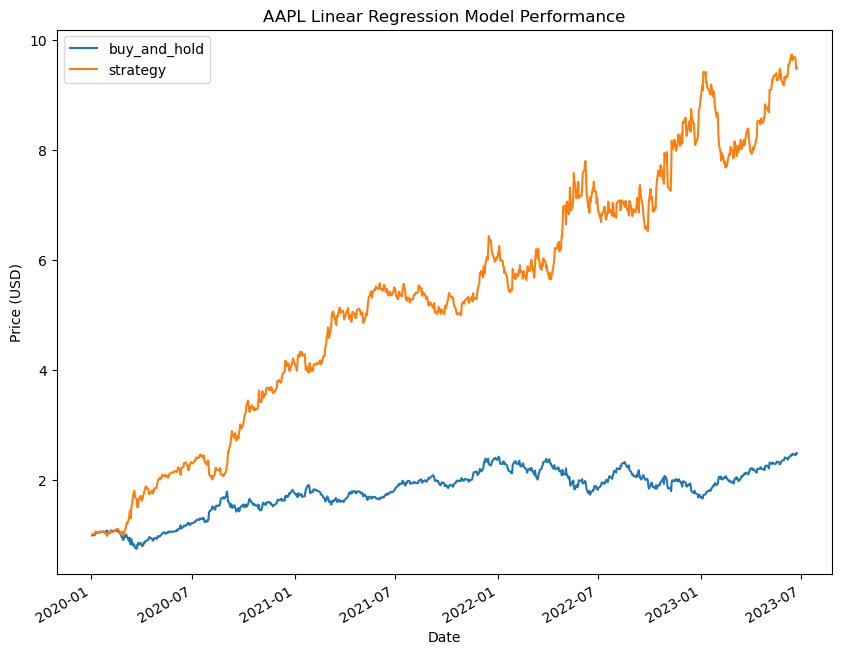

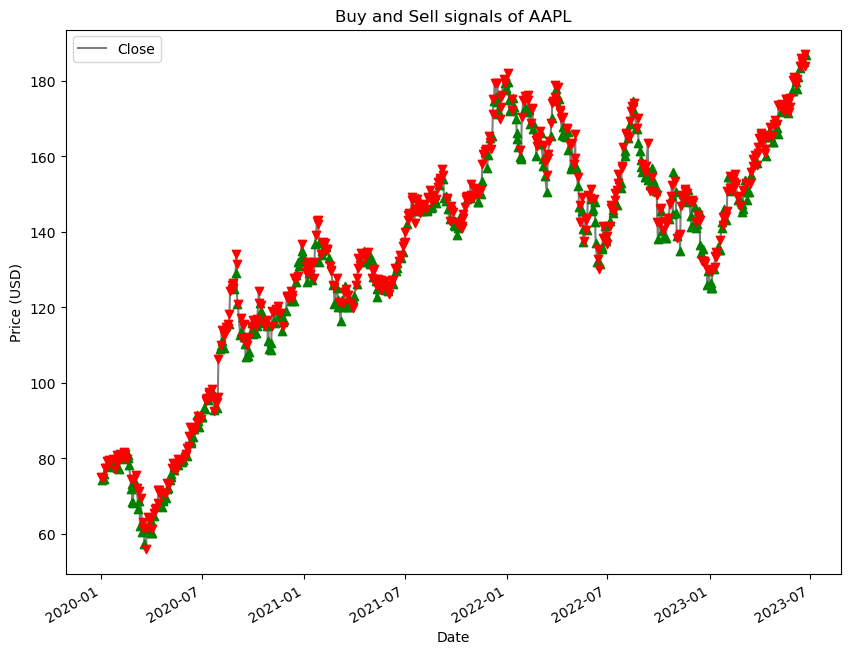

In [12]:
aapl = LinearRegressionModel("AAPL", "2020-01-01")
aapl.performance_summary()

# 2. Lasso Regression

In [2]:
class LassoModel():

    def __init__(self, symbol, start, end=datetime.datetime.now()):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.get_data()
    
    def get_data(self):
            
        # extract data
        data = yf.download(self.symbol, self.start, self.end)

        # target variable
        target = "Close"

        # predictors
        predictor = ["Open", "High", "Low", "Volume"]

        # create features
        X = data[predictor]
        y = data[target]

        # split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # create model
        self.model = Lasso(alpha=0.1)

        # fit model
        self.model.fit(X_train, y_train)

        # predict
        y_pred = self.model.predict(X_test)

        # evaluate
        print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
        print('R2 Score: %.2f' % r2_score(y_test, y_pred))
        print("#" * 50)

        # generate entry and exit signals
        data["Predicted"] = self.model.predict(data[predictor])
        buysignals = data[data["Close"] < data["Predicted"]]
        sellsignals = data[data["Close"] > data["Predicted"]]

        # position
        data["position"] = np.where(data["Close"] < data["Predicted"], 1, -1)

        # buy and hold strategy
        data["buy_and_hold"] = np.log(data["Close"] / data["Close"].shift(1))

        # strategy returns
        data["strategy"] = data["position"].shift(1) * data["buy_and_hold"]

        # drop na
        data.dropna(inplace=True)

        # set date as index
        data.reset_index(inplace=True)
        data.set_index('Date', inplace=True)

        # assign to self
        self.data = data
        self.buysignals = buysignals
        self.sellsignals = sellsignals

        return data, buysignals, sellsignals

    def performance_summary(self):
             
        # calculate sum of buy_and_hold
        # calculate sum
        print("Sum of buy_and_hold:")
        print(self.data[["buy_and_hold", "strategy"]].sum(), "\n")
        print("#" * 50)

        # calculate what $1 would be worth
        print("What $1 would be worth:")
        print(self.data[["buy_and_hold", "strategy"]].cumsum().apply(np.exp), "\n")
        print("#" * 50)

        # calculate performance metrics
        print("Performance metrics:")
        pf.show_perf_stats(self.data["strategy"])
        print("#" * 50)

        # Plot graph
        self.data[["buy_and_hold", "strategy"]].cumsum().apply(np.exp).plot(figsize=(10, 8))
        plt.legend(loc="upper left")
        plt.title(f"{self.symbol} Lasso Model Performance")
        plt.ylabel("Price (USD)")
        plt.xlabel("Date")

        # plot buy and sell signals
        self.data[["Close"]].plot(figsize=(10, 8), color="gray", zorder=1)
        plt.title(f"Buy and Sell signals of {self.symbol}")
        plt.ylabel("Price (USD)")
        plt.xlabel("Date")

        plt.scatter(self.buysignals.index, self.buysignals["Close"], marker="^", color="green")
        plt.scatter(self.sellsignals.index, self.sellsignals["Close"], marker="v", color="red")               

        plt.legend()
        plt.show()

[*********************100%***********************]  1 of 1 completed
Mean squared error: 1.07
R2 Score: 1.00
##################################################
Sum of buy_and_hold:
buy_and_hold    0.915711
strategy        1.476404
dtype: float64 

##################################################
What $1 would be worth:
            buy_and_hold  strategy
Date                              
2020-01-03      0.990278  1.009817
2020-01-06      0.998169  1.017864
2020-01-07      0.993474  1.022674
2020-01-08      1.009456  1.039125
2020-01-09      1.030897  1.017512
...                  ...       ...
2023-06-20      2.463925  4.489504
2023-06-21      2.449942  4.464025
2023-06-22      2.490428  4.391455
2023-06-23      2.486166  4.398982
2023-06-26      2.498552  4.377176

[875 rows x 2 columns] 

##################################################
Performance metrics:


Start date,2020-01-03
End date,2023-06-26
Total months,41
,Backtest
Annual return,43.8%
Cumulative returns,253.4%
Annual volatility,35.2%
Sharpe ratio,1.21
Calmar ratio,1.60
Stability,0.76
Max drawdown,-27.3%


##################################################


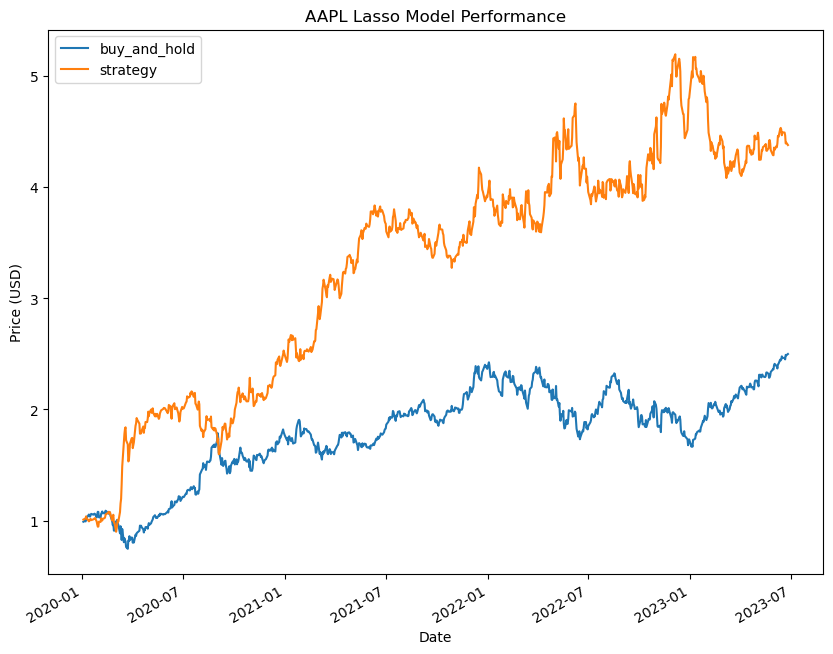

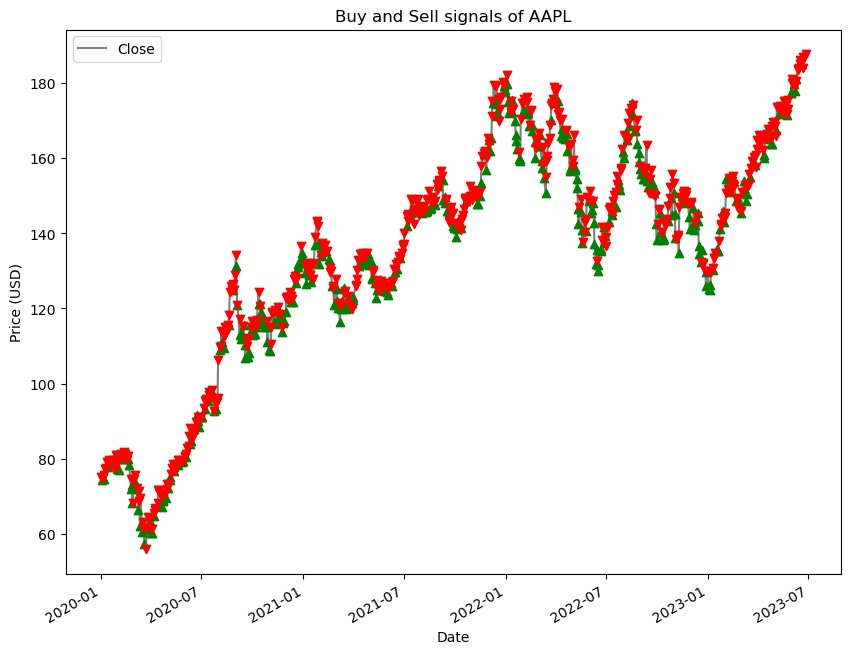

In [3]:
aapl = LassoModel("AAPL", "2020-01-01")
aapl.performance_summary()

# 3. Ridge Regression

In [4]:
class RidgeModel():

    def __init__(self, symbol, start, end=datetime.datetime.now()):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.get_data()
    
    def get_data(self):
        
        # extract data
        data = yf.download(self.symbol, self.start, self.end)

        # target variable
        target = "Close"

        # predictors
        predictor = ["Open", "High", "Low", "Volume"]

        # create features
        X = data[predictor]
        y = data[target]

        # split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # create model
        self.model = Ridge(alpha=0.1)

        # fit model
        self.model.fit(X_train, y_train)

        # predict
        y_pred = self.model.predict(X_test)

        # evaluate
        print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
        print('R2 Score: %.2f' % r2_score(y_test, y_pred))
        print("#" * 50)

        # generate entry and exit signals
        data["Predicted"] = self.model.predict(data[predictor])
        buysignals = data[data["Close"] < data["Predicted"]]
        sellsignals = data[data["Close"] > data["Predicted"]]

        # position
        data["position"] = np.where(data["Close"] < data["Predicted"], 1, -1)

        # buy and hold strategy
        data["buy_and_hold"] = np.log(data["Close"] / data["Close"].shift(1))

        # strategy returns
        data["strategy"] = data["position"].shift(1) * data["buy_and_hold"]

        # drop na
        data.dropna(inplace=True)

        # set date as index
        data.reset_index(inplace=True)
        data.set_index('Date', inplace=True)

        # assign to self
        self.data = data
        self.buysignals = buysignals
        self.sellsignals = sellsignals

        return data, buysignals, sellsignals
    
    def performance_summary(self):
            
        # calculate sum of buy_and_hold
        # calculate sum
        print("Sum of buy_and_hold:")
        print(self.data[["buy_and_hold", "strategy"]].sum(), "\n")
        print("#" * 50)

        # calculate what $1 would be worth
        print("What $1 would be worth:")
        print(self.data[["buy_and_hold", "strategy"]].cumsum().apply(np.exp), "\n")
        print("#" * 50)

        # calculate performance metrics
        print("Performance metrics:")
        pf.show_perf_stats(self.data["strategy"])
        print("#" * 50)

        # Plot graph
        self.data[["buy_and_hold", "strategy"]].cumsum().apply(np.exp).plot(figsize=(10, 8))
        plt.legend(loc="upper left")
        plt.title(f"{self.symbol} Ridge Model Performance")
        plt.ylabel("Price (USD)")
        plt.xlabel("Date")

        # plot buy and sell signals
        self.data[["Close"]].plot(figsize=(10, 8), color="gray", zorder=1)
        plt.title(f"Buy and Sell signals of {self.symbol}")
        plt.ylabel("Price (USD)")
        plt.xlabel("Date")

        plt.scatter(self.buysignals.index, self.buysignals["Close"], marker="^", color="green")
        plt.scatter(self.sellsignals.index, self.sellsignals["Close"], marker="v", color="red")               

        plt.legend()
        plt.show()

[*********************100%***********************]  1 of 1 completed
Mean squared error: 0.87
R2 Score: 1.00
##################################################
Sum of buy_and_hold:
buy_and_hold    0.915125
strategy        2.285945
dtype: float64 

##################################################
What $1 would be worth:
            buy_and_hold  strategy
Date                              
2020-01-03      0.990278  1.009817
2020-01-06      0.998169  1.017864
2020-01-07      0.993474  1.022674
2020-01-08      1.009456  1.039125
2020-01-09      1.030897  1.061197
...                  ...       ...
2023-06-20      2.463925  9.993466
2023-06-21      2.449942  9.936750
2023-06-22      2.490428  9.775212
2023-06-23      2.486166  9.791969
2023-06-26      2.497087  9.834981

[875 rows x 2 columns] 

##################################################
Performance metrics:


Start date,2020-01-03
End date,2023-06-26
Total months,41
,Backtest
Annual return,81.6%
Cumulative returns,694.5%
Annual volatility,35.0%
Sharpe ratio,1.88
Calmar ratio,4.27
Stability,0.87
Max drawdown,-19.1%


##################################################


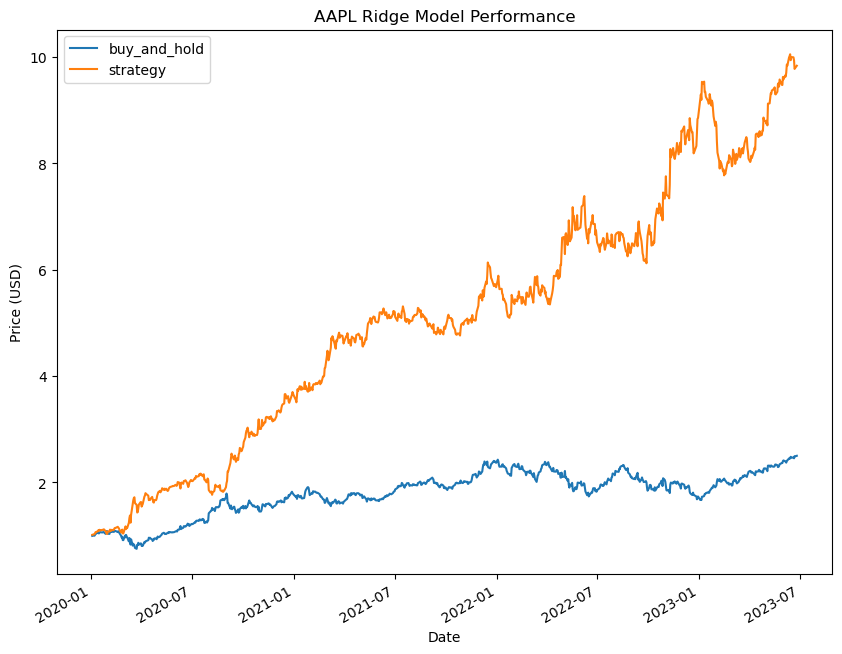

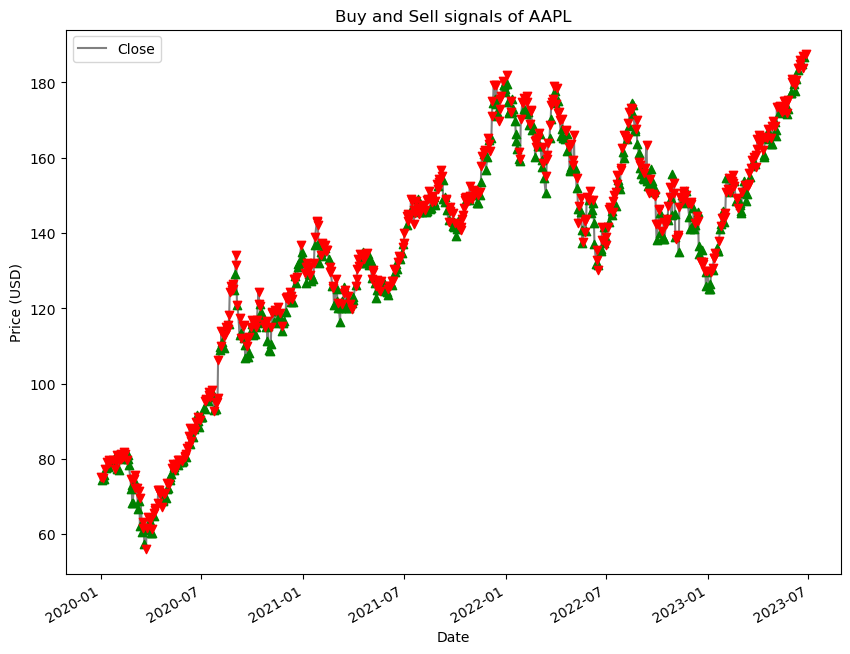

In [5]:
aapl = RidgeModel("AAPL", "2020-01-01")
aapl.performance_summary()